In [1]:
import dataframe_image as dfi
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt
import time
import os, requests

In [2]:
def formula_as_file( formula, file, negate=False ):
    tfile = file
    if negate:
        tfile = 'tmp.png'
    r = requests.get( 'http://latex.codecogs.com/png.latex?\dpi{300} \huge %s' % formula )
    f = open( tfile, 'wb' )
    f.write( r.content )
    f.close()
    if negate:
        os.system( 'convert tmp.png -channel RGB -negate -colorspace rgb %s' %file )

In [3]:
path = "../data"

pulsar_data = pd.read_csv(path + "/input/HTRU2/HTRU_2.csv", 
                          low_memory=False, index_col=False, header=0, 
                          names=["mean_IP", "standDev_IP", "excessKurt_IP", "skewness_IP", 
                                 "mean_DMSNR", "standDev_DMSNR", "excessKurt_DMSNR", "skewness_DMSNR", "pulsar"])
df_styled = pulsar_data.head().style.set_caption("Data Head")
dfi.export(df_styled, path + "/output/data_head.png")
df_styled

,mean_IP,standDev_IP,excessKurt_IP,skewness_IP,mean_DMSNR,standDev_DMSNR,excessKurt_DMSNR,skewness_DMSNR,pulsar
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0


In [4]:
df_styled = pulsar_data.describe().style.set_caption("Data Description")
dfi.export(df_styled, path + "/output/data_describe.png")
df_styled

,mean_IP,standDev_IP,excessKurt_IP,skewness_IP,mean_DMSNR,standDev_DMSNR,excessKurt_DMSNR,skewness_DMSNR,pulsar
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419,0.091580
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270,0.288440
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119,0.000000
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996,0.000000
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [5]:
X, y = pulsar_data.iloc[:, :8], pulsar_data.iloc[:, 8]

<AxesSubplot:>

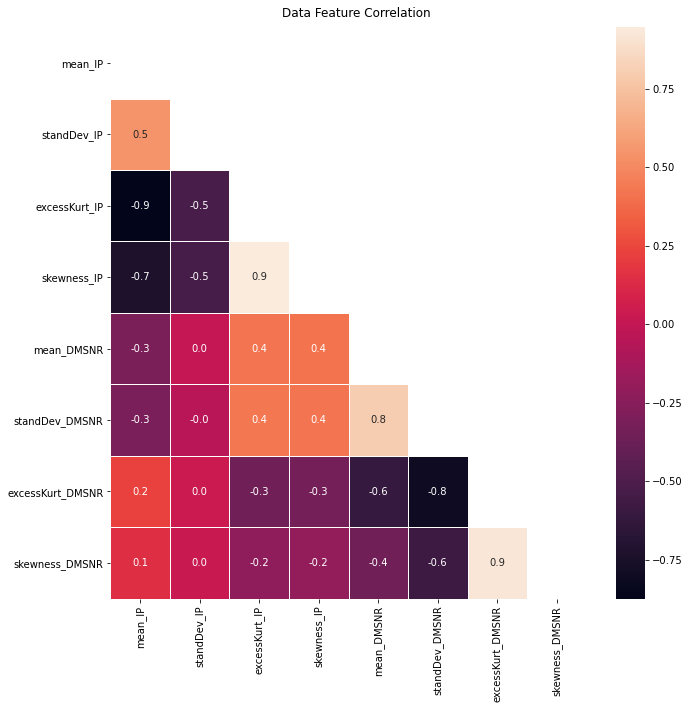

In [6]:
f,ax = plt.subplots(figsize=(10, 10))
corr = X.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f.suptitle("Data Feature Correlation")
f.set_tight_layout(tight=True)
feature_corr = sns.heatmap(corr, mask=mask, annot=True, linewidths=.5, fmt= '.1f',ax=ax)
f.savefig(path + "/output/data_feature_correlation.png")
feature_corr

<function matplotlib.pyplot.show(close=None, block=None)>

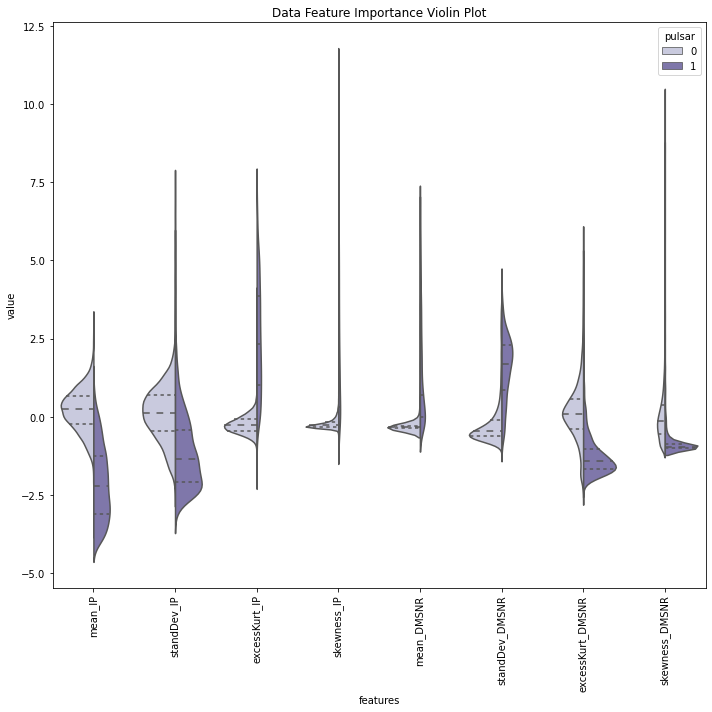

In [7]:
data_dia = y
data = X
data_n_2 = (data - data.mean()) / (data.std())
data = pd.concat([y,data_n_2],axis=1)
data = pd.melt(data,id_vars="pulsar",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
violin_plt = sns.violinplot(x="features", y="value", hue="pulsar", data=data, palette="Purples", split=True, inner="quart")
plt.xticks(rotation=90)
plt.title('Data Feature Importance Violin Plot')
plt.tight_layout()
plt.savefig(path + "/output/data_feature_importance_violin.png")
plt.show

In [11]:
mean_ip = r'\frac{1}{n} \sum_{i=1}^{n} p_i'
formula_as_file(mean_ip, path + '/output/mean_ip.png')

standDev_ip = r'\sqrt{\frac{\sum_{i=1}^{n} (p_i - \bar{P})^2}{n-1}}'
formula_as_file(standDev_ip, path + '/output/standDev_ip.png')

excessKurt_ip = r'\frac{\frac{1}{n} (\sum_{i=1}^{n} (p_i - \bar{P})^4)}{(\frac{1}{n} (\sum_{i=1}^{n} (p_i - \bar{P})^2))^2} - 3'
formula_as_file(excessKurt_ip, path + '/output/excessKurt_ip.png')

skewness_ip = r'\frac{\frac{1}{n} \sum_{i=1}^{n} (p_i - \bar{P})^3}{(\sqrt{\frac{1}{n} \sum_{i=1}^{n} (p_i - \bar{P})^2})^3}'
formula_as_file(skewness_ip, path + '/output/skewness_ip.png')

mean_DMSNR = r'\frac{1}{n} \sum_{i=1}^{n} d_i'
formula_as_file(mean_DMSNR, path + '/output/mean_DMSNR.png')

standDev_DMSNR = r'\sqrt{\frac{\sum_{i=1}^{n} (d_i - \bar{D})^2}{n-1}}'
formula_as_file(standDev_DMSNR, path + '/output/standDev_DMSNR.png')

excessKurt_DMSNR = r'\frac{\frac{1}{n} (\sum_{i=1}^{n} (d_i - \bar{D})^4)}{(\frac{1}{n} (\sum_{i=1}^{n} (d_i - \bar{D})^2))^2} - 3'
formula_as_file(excessKurt_DMSNR, path + '/output/excessKurt_DMSNR.png')

skewness_DMSNR = r'\frac{\frac{1}{n} \sum_{i=1}^{n} (d_i - \bar{D})^3}{(\sqrt{\frac{1}{n} \sum_{i=1}^{n} (d_i - \bar{D})^2})^3}'
formula_as_file(skewness_DMSNR, path + '/output/skewness_DMSNR.png')

features_instance = pd.DataFrame([["mean_IP", "Mean of the integrated profile"], 
                                 ["standDev_IP", "Standard deviation of the integrated profile"], 
                                 ["excessKurt_IP", "Excess kurtosis of the integrated profile"], 
                                 ["skewness_IP", "Skewness of the integrated profile"], 
                                 ["mean_DMSNR","Mean of the DM-SNR curve"], 
                                 ["standDev_DMSNR", "Standard deviation of the DM-SNR curve"], 
                                 ["excessKurt_DMSNR", "Excess kurtosis of the DM-SNR curve"], 
                                 ["skewness_DMSNR", "Skewness of the DM-SNR curve"]], 
                                 columns=["Feature", "Description"])

features_instance = features_instance.style.set_caption("Data Features")
dfi.export(features_instance, path + "/output/features_instance.png")
features_instance

,Feature,Description
0,mean_IP,Mean of the integrated profile
1,standDev_IP,Standard deviation of the integrated profile
2,excessKurt_IP,Excess kurtosis of the integrated profile
3,skewness_IP,Skewness of the integrated profile
4,mean_DMSNR,Mean of the DM-SNR curve
5,standDev_DMSNR,Standard deviation of the DM-SNR curve
6,excessKurt_DMSNR,Excess kurtosis of the DM-SNR curve
7,skewness_DMSNR,Skewness of the DM-SNR curve


In [12]:
Clustering_Metrics = pd.read_csv(path + "/output/kmeans_metrics.csv", 
                          low_memory=False, index_col=[0], header=0)

Clustering_Metrics

,Clustering Algorithm,Normalization Method,Rand Index,Fowlkes-Mallow
0,K-means,z-score,0.934777,0.962299
1,K-means,robust scalar,0.849772,0.910860


In [13]:
Clustering_Metrics = Clustering_Metrics.append(pd.read_csv(path + "/output/optics_metrics.csv", 
                          low_memory=False, index_col=[0], header=0), ignore_index=True)
                                               
Clustering_Metrics

,Clustering Algorithm,Normalization Method,Rand Index,Fowlkes-Mallow
0,K-means,z-score,0.934777,0.962299
1,K-means,robust scalar,0.849772,0.910860
2,OPTICS,z-score,0.880615,0.928114
3,OPTICS,robust scalar,0.833149,0.895164


In [14]:
Clustering_Metrics = Clustering_Metrics.append(pd.read_csv(path + "/output/SP_DB_AG_metrics.csv", 
                          low_memory=False, index_col=[0], header=0), ignore_index=True)

Clustering_Metrics

,Clustering Algorithm,Normalization Method,Rand Index,Fowlkes-Mallow
0,K-means,z-score,0.934777,0.962299
1,K-means,robust scalar,0.849772,0.910860
2,OPTICS,z-score,0.880615,0.928114
3,OPTICS,robust scalar,0.833149,0.895164
4,Spectral Clustering,z-score,0.876046,0.924212
5,Spectral Clustering,robust scalar,0.858046,0.913716
6,Spectral Clustering,quantile scalar,0.943259,0.966618
7,DBSCAN Clustering,z-score,0.869196,0.920768
8,DBSCAN Clustering,robust scalar,0.817732,0.884864
9,Agglomerative Clustering,z-score,0.910733,0.949834


In [15]:
Clustering_Metrics.loc[(Clustering_Metrics.duplicated(subset=['Clustering Algorithm'])) == True,"Clustering Algorithm"] = ' '

In [16]:
Clustering_Metrics = Clustering_Metrics.style.set_caption("Clustering Metrics").background_gradient()
dfi.export(Clustering_Metrics, path + "/output/Clustering_Metrics.png")
Clustering_Metrics

,Clustering Algorithm,Normalization Method,Rand Index,Fowlkes-Mallow
0,K-means,z-score,0.934777,0.962299
1,,robust scalar,0.849772,0.910860
2,OPTICS,z-score,0.880615,0.928114
3,,robust scalar,0.833149,0.895164
4,Spectral Clustering,z-score,0.876046,0.924212
5,,robust scalar,0.858046,0.913716
6,,quantile scalar,0.943259,0.966618
7,DBSCAN Clustering,z-score,0.869196,0.920768
8,,robust scalar,0.817732,0.884864
9,Agglomerative Clustering,z-score,0.910733,0.949834


In [17]:
quantile_function = r'\Phi^{-1} = \sqrt{2}erf^{-1}(2p-1), p\in{(0,1)}'
formula_as_file(quantile_function, path + '/output/quantile_function.png')

In [18]:
paper_dataset_results = pd.DataFrame([["HTRU2", "C4.5", 0.926, 0.740, 0.904, 0.635, 0.949, 0.051, 0.946, "-"], 
                                      [" ", "MLP", 0.931, 0.752, 0.913, 0.650, 0.950, 0.050, 0.947, "-"], 
                                      [" ", "NB", 0.902, 0.692, 0.863, 0.579, 0.943, 0.057, 0.937, "-"],
                                      [" ", "SVM", 0.919, 0.789, 0.871, 0.723, 0.969, 0.031, 0.961, "-"],
                                      [" ", "GH-VFDT", 0.907, 0.862, 0.829, 0.899, 0.992, 0.008, 0.978, "-"]],
                                      columns=["Data Set", "Algorithm", "G-Mean", "F-Score", "Recall", 
                                               "Precision", "Specificity", "FPR", "Accuracy", "AUC"])
                                      
paper_dataset_results

,Data Set,Algorithm,G-Mean,F-Score,Recall,Precision,Specificity,FPR,Accuracy,AUC
0,HTRU2,C4.5,0.926,0.740,0.904,0.635,0.949,0.051,0.946,-
1,,MLP,0.931,0.752,0.913,0.650,0.950,0.050,0.947,-
2,,NB,0.902,0.692,0.863,0.579,0.943,0.057,0.937,-
3,,SVM,0.919,0.789,0.871,0.723,0.969,0.031,0.961,-
4,,GH-VFDT,0.907,0.862,0.829,0.899,0.992,0.008,0.978,-


In [19]:
paper_dataset_results = paper_dataset_results.style.set_caption("Paper Classification Results").background_gradient()
dfi.export(paper_dataset_results, path + "/output/paper_dataset_results.png")
paper_dataset_results

,Data Set,Algorithm,G-Mean,F-Score,Recall,Precision,Specificity,FPR,Accuracy,AUC
0,HTRU2,C4.5,0.926000,0.740000,0.904000,0.635000,0.949000,0.051000,0.946000,-
1,,MLP,0.931000,0.752000,0.913000,0.650000,0.950000,0.050000,0.947000,-
2,,NB,0.902000,0.692000,0.863000,0.579000,0.943000,0.057000,0.937000,-
3,,SVM,0.919000,0.789000,0.871000,0.723000,0.969000,0.031000,0.961000,-
4,,GH-VFDT,0.907000,0.862000,0.829000,0.899000,0.992000,0.008000,0.978000,-


In [75]:
NB_results = pd.read_csv(path + "/output/NB_metrics_papersplit.csv", low_memory=False, header=0)

NB_results

,gmean,fscore,recall,precision,specificity,fpr,accuracy,roc_auc
0,0.897844,0.638882,0.873523,0.503606,0.922842,0.077158,0.918786,0.898183


In [76]:
NB_results = NB_results.append(pd.read_csv(path + "/output/NB_metrics_3fold.csv", low_memory=False, header=0), ignore_index=True) 

NB_results

,gmean,fscore,recall,precision,specificity,fpr,accuracy,roc_auc
0,0.897844,0.638882,0.873523,0.503606,0.922842,0.077158,0.918786,0.898183
1,0.910090,0.739984,0.870610,0.643443,0.951360,0.048640,0.943965,0.910985


In [77]:
NB_results = NB_results.append(pd.read_csv(path + "/output/NB_metrics_5fold.csv", low_memory=False, header=0), ignore_index=True) 

NB_results

,gmean,fscore,recall,precision,specificity,fpr,accuracy,roc_auc
0,0.897844,0.638882,0.873523,0.503606,0.922842,0.077158,0.918786,0.898183
1,0.910090,0.739984,0.870610,0.643443,0.951360,0.048640,0.943965,0.910985
2,0.907040,0.733850,0.865854,0.636771,0.950185,0.049815,0.942458,0.908019


In [78]:
NB_results = NB_results.append(pd.read_csv(path + "/output/NB_metrics_10fold.csv", low_memory=False, header=0), ignore_index=True) 

NB_results

,gmean,fscore,recall,precision,specificity,fpr,accuracy,roc_auc
0,0.897844,0.638882,0.873523,0.503606,0.922842,0.077158,0.918786,0.898183
1,0.910090,0.739984,0.870610,0.643443,0.951360,0.048640,0.943965,0.910985
2,0.907040,0.733850,0.865854,0.636771,0.950185,0.049815,0.942458,0.908019
3,0.900629,0.727273,0.853659,0.633484,0.950185,0.049815,0.941341,0.901922


In [79]:
NB_results.insert(0, "Split", ['Lyons', '3 Fold CV', '5 Fold CV', '10 Fold CV'])

NB_results

,Split,gmean,fscore,recall,precision,specificity,fpr,accuracy,roc_auc
0,Lyons,0.897844,0.638882,0.873523,0.503606,0.922842,0.077158,0.918786,0.898183
1,3 Fold CV,0.910090,0.739984,0.870610,0.643443,0.951360,0.048640,0.943965,0.910985
2,5 Fold CV,0.907040,0.733850,0.865854,0.636771,0.950185,0.049815,0.942458,0.908019
3,10 Fold CV,0.900629,0.727273,0.853659,0.633484,0.950185,0.049815,0.941341,0.901922


In [80]:
NB_results.insert(1, "Algorithm", ['NB', 'NB', 'NB', 'NB'])

NB_results

,Split,Algorithm,gmean,fscore,recall,precision,specificity,fpr,accuracy,roc_auc
0,Lyons,NB,0.897844,0.638882,0.873523,0.503606,0.922842,0.077158,0.918786,0.898183
1,3 Fold CV,NB,0.910090,0.739984,0.870610,0.643443,0.951360,0.048640,0.943965,0.910985
2,5 Fold CV,NB,0.907040,0.733850,0.865854,0.636771,0.950185,0.049815,0.942458,0.908019
3,10 Fold CV,NB,0.900629,0.727273,0.853659,0.633484,0.950185,0.049815,0.941341,0.901922


In [81]:
NB_results = NB_results.rename(columns={"gmean": "G-Mean", "fscore": "F-Score", 
                           "recall": "Recall", "precision": "Precision", 
                           "specificity": "Specificity", "fpr": "FPR", 
                           "accuracy": "Accuracy", "roc_auc": "AUC",})
NB_results

,Split,Algorithm,G-Mean,F-Score,Recall,Precision,Specificity,FPR,Accuracy,AUC
0,Lyons,NB,0.897844,0.638882,0.873523,0.503606,0.922842,0.077158,0.918786,0.898183
1,3 Fold CV,NB,0.910090,0.739984,0.870610,0.643443,0.951360,0.048640,0.943965,0.910985
2,5 Fold CV,NB,0.907040,0.733850,0.865854,0.636771,0.950185,0.049815,0.942458,0.908019
3,10 Fold CV,NB,0.900629,0.727273,0.853659,0.633484,0.950185,0.049815,0.941341,0.901922


In [82]:
RF_results = pd.read_csv(path + "/output/rf_paper_split_metrics.csv", low_memory=False, header=0)

RF_results

,data_set,Algorithm,G-Mean,fscore,recall,precision,specificity,fpr,accuracy
0,HTRU 2,Random Forest,0.709517,0.684211,0.930507,0.54101,0.54101,0.45899,0.929359


In [83]:
RF_results = RF_results.append(pd.read_csv(path + "/output/rf_3_fold_metrics.csv", low_memory=False, header=0), ignore_index=True) 

RF_results

,data_set,Algorithm,G-Mean,fscore,recall,precision,specificity,fpr,accuracy
0,HTRU 2,Random Forest,0.709517,0.684211,0.930507,0.541010,0.541010,0.458990,0.929359
1,HTRU 2,Random Forest,0.886998,0.886559,0.859519,0.915354,0.915354,0.084646,0.979854


In [84]:
RF_results = RF_results.append(pd.read_csv(path + "/output/rf_5_fold_metrics.csv", low_memory=False, header=0), ignore_index=True) 

RF_results

,data_set,Algorithm,G-Mean,fscore,recall,precision,specificity,fpr,accuracy
0,HTRU 2,Random Forest,0.709517,0.684211,0.930507,0.541010,0.541010,0.458990,0.929359
1,HTRU 2,Random Forest,0.886998,0.886559,0.859519,0.915354,0.915354,0.084646,0.979854
2,HTRU 2,Random Forest,0.882942,0.882629,0.859756,0.906752,0.906752,0.093248,0.979050


In [85]:
RF_results = RF_results.append(pd.read_csv(path + "/output/rf_10_fold_metrics.csv", low_memory=False, header=0), ignore_index=True) 

RF_results

,data_set,Algorithm,G-Mean,fscore,recall,precision,specificity,fpr,accuracy
0,HTRU 2,Random Forest,0.709517,0.684211,0.930507,0.541010,0.541010,0.458990,0.929359
1,HTRU 2,Random Forest,0.886998,0.886559,0.859519,0.915354,0.915354,0.084646,0.979854
2,HTRU 2,Random Forest,0.882942,0.882629,0.859756,0.906752,0.906752,0.093248,0.979050
3,HTRU 2,Random Forest,0.872482,0.872274,0.853659,0.891720,0.891720,0.108280,0.977095


In [86]:
RF_results = RF_results.drop(RF_results.columns[0], axis=1)

RF_results

,Algorithm,G-Mean,fscore,recall,precision,specificity,fpr,accuracy
0,Random Forest,0.709517,0.684211,0.930507,0.541010,0.541010,0.458990,0.929359
1,Random Forest,0.886998,0.886559,0.859519,0.915354,0.915354,0.084646,0.979854
2,Random Forest,0.882942,0.882629,0.859756,0.906752,0.906752,0.093248,0.979050
3,Random Forest,0.872482,0.872274,0.853659,0.891720,0.891720,0.108280,0.977095


In [87]:
RF_results.insert(0, "Split", ['Lyons', '3 Fold CV', '5 Fold CV', '10 Fold CV'])

RF_results

,Split,Algorithm,G-Mean,fscore,recall,precision,specificity,fpr,accuracy
0,Lyons,Random Forest,0.709517,0.684211,0.930507,0.541010,0.541010,0.458990,0.929359
1,3 Fold CV,Random Forest,0.886998,0.886559,0.859519,0.915354,0.915354,0.084646,0.979854
2,5 Fold CV,Random Forest,0.882942,0.882629,0.859756,0.906752,0.906752,0.093248,0.979050
3,10 Fold CV,Random Forest,0.872482,0.872274,0.853659,0.891720,0.891720,0.108280,0.977095


In [88]:
RF_results["AUC"] = ['-', '-',  '-', '-']
RF_results

,Split,Algorithm,G-Mean,fscore,recall,precision,specificity,fpr,accuracy,AUC
0,Lyons,Random Forest,0.709517,0.684211,0.930507,0.541010,0.541010,0.458990,0.929359,-
1,3 Fold CV,Random Forest,0.886998,0.886559,0.859519,0.915354,0.915354,0.084646,0.979854,-
2,5 Fold CV,Random Forest,0.882942,0.882629,0.859756,0.906752,0.906752,0.093248,0.979050,-
3,10 Fold CV,Random Forest,0.872482,0.872274,0.853659,0.891720,0.891720,0.108280,0.977095,-


In [89]:
RF_results = RF_results.rename(columns={"gmean": "G-Mean", "fscore": "F-Score", 
                           "recall": "Recall", "precision": "Precision", 
                           "specificity": "Specificity", "fpr": "FPR", 
                           "accuracy": "Accuracy"})
RF_results

,Split,Algorithm,G-Mean,F-Score,Recall,Precision,Specificity,FPR,Accuracy,AUC
0,Lyons,Random Forest,0.709517,0.684211,0.930507,0.541010,0.541010,0.458990,0.929359,-
1,3 Fold CV,Random Forest,0.886998,0.886559,0.859519,0.915354,0.915354,0.084646,0.979854,-
2,5 Fold CV,Random Forest,0.882942,0.882629,0.859756,0.906752,0.906752,0.093248,0.979050,-
3,10 Fold CV,Random Forest,0.872482,0.872274,0.853659,0.891720,0.891720,0.108280,0.977095,-


In [90]:
AB_results = pd.read_csv(path + "/output/AdaBoost_metrics_papersplit.csv", low_memory=False, header=0)

AB_results

,gmean,fscore,recall,precision,specificity,fpr,accuracy,roc_auc
0,0.939231,0.780041,0.917999,0.678131,0.960954,0.039046,0.957421,0.939476


In [91]:
AB_results = AB_results.append(pd.read_csv(path + "/output/AdaBoost_metrics_3fold.csv", low_memory=False, header=0), ignore_index=True) 

AB_results

,gmean,fscore,recall,precision,specificity,fpr,accuracy,roc_auc
0,0.939231,0.780041,0.917999,0.678131,0.960954,0.039046,0.957421,0.939476
1,0.911816,0.877907,0.837338,0.922607,0.992918,0.007082,0.978669,0.915128


In [92]:
AB_results = AB_results.append(pd.read_csv(path + "/output/AdaBoost_metrics_5fold.csv", low_memory=False, header=0), ignore_index=True) 

AB_results

,gmean,fscore,recall,precision,specificity,fpr,accuracy,roc_auc
0,0.939231,0.780041,0.917999,0.678131,0.960954,0.039046,0.957421,0.939476
1,0.911816,0.877907,0.837338,0.922607,0.992918,0.007082,0.978669,0.915128
2,0.913639,0.876190,0.841463,0.913907,0.992005,0.007995,0.978212,0.916734


In [93]:
AB_results = AB_results.append(pd.read_csv(path + "/output/AdaBoost_metrics_10fold.csv", low_memory=False, header=0), ignore_index=True) 

AB_results

,gmean,fscore,recall,precision,specificity,fpr,accuracy,roc_auc
0,0.939231,0.780041,0.917999,0.678131,0.960954,0.039046,0.957421,0.939476
1,0.911816,0.877907,0.837338,0.922607,0.992918,0.007082,0.978669,0.915128
2,0.913639,0.876190,0.841463,0.913907,0.992005,0.007995,0.978212,0.916734
3,0.902813,0.857143,0.823171,0.894040,0.990160,0.009840,0.974860,0.906665


In [94]:
AB_results.insert(0, "Split", ['Lyons', '3 Fold CV', '5 Fold CV', '10 Fold CV'])

AB_results

,Split,gmean,fscore,recall,precision,specificity,fpr,accuracy,roc_auc
0,Lyons,0.939231,0.780041,0.917999,0.678131,0.960954,0.039046,0.957421,0.939476
1,3 Fold CV,0.911816,0.877907,0.837338,0.922607,0.992918,0.007082,0.978669,0.915128
2,5 Fold CV,0.913639,0.876190,0.841463,0.913907,0.992005,0.007995,0.978212,0.916734
3,10 Fold CV,0.902813,0.857143,0.823171,0.894040,0.990160,0.009840,0.974860,0.906665


In [95]:
AB_results.insert(1, "Algorithm", ['AdaBoost', 'AdaBoost', 'AdaBoost', 'AdaBoost'])

AB_results

,Split,Algorithm,gmean,fscore,recall,precision,specificity,fpr,accuracy,roc_auc
0,Lyons,AdaBoost,0.939231,0.780041,0.917999,0.678131,0.960954,0.039046,0.957421,0.939476
1,3 Fold CV,AdaBoost,0.911816,0.877907,0.837338,0.922607,0.992918,0.007082,0.978669,0.915128
2,5 Fold CV,AdaBoost,0.913639,0.876190,0.841463,0.913907,0.992005,0.007995,0.978212,0.916734
3,10 Fold CV,AdaBoost,0.902813,0.857143,0.823171,0.894040,0.990160,0.009840,0.974860,0.906665


In [96]:
AB_results = AB_results.rename(columns={"gmean": "G-Mean", "fscore": "F-Score", 
                           "recall": "Recall", "precision": "Precision", 
                           "specificity": "Specificity", "fpr": "FPR", 
                           "accuracy": "Accuracy", "roc_auc": "AUC",})
AB_results

,Split,Algorithm,G-Mean,F-Score,Recall,Precision,Specificity,FPR,Accuracy,AUC
0,Lyons,AdaBoost,0.939231,0.780041,0.917999,0.678131,0.960954,0.039046,0.957421,0.939476
1,3 Fold CV,AdaBoost,0.911816,0.877907,0.837338,0.922607,0.992918,0.007082,0.978669,0.915128
2,5 Fold CV,AdaBoost,0.913639,0.876190,0.841463,0.913907,0.992005,0.007995,0.978212,0.916734
3,10 Fold CV,AdaBoost,0.902813,0.857143,0.823171,0.894040,0.990160,0.009840,0.974860,0.906665


In [97]:
XG_results = pd.read_csv(path + "/output/XGBoost_metrics.csv", low_memory=False, header=0, index_col=0)

XG_results

,Split,Algorithm,G-Mean,F-Score,Recall,Precision,Specificity,FPR,Accuracy,AUC
0,Lyons,XGBoost,0.862534,0.862526,0.858930,0.866153,0.988106,0.011894,0.977482,0.923518
1,10 Fold CV,XGBoost,0.869716,0.869565,0.853659,0.886076,0.988930,0.011070,0.976536,0.921294
2,Group,XGBoost,0.842414,0.842349,0.852895,0.832061,0.992791,0.007209,0.987167,0.922843
3,3 Fold CV,XGBoost,0.885600,0.885581,0.879852,0.891386,0.989191,0.010809,0.979177,0.934522
4,5 Fold CV,XGBoost,0.876337,0.876336,0.875000,0.877676,0.987700,0.012300,0.977374,0.931350


In [103]:
Final_results = NB_results.append(RF_results.append(AB_results.append(XG_results, ignore_index=True), ignore_index=True), ignore_index=True)

Final_results

,Split,Algorithm,G-Mean,F-Score,Recall,Precision,Specificity,FPR,Accuracy,AUC
0,Lyons,NB,0.897844,0.638882,0.873523,0.503606,0.922842,0.077158,0.918786,0.898183
1,3 Fold CV,NB,0.910090,0.739984,0.870610,0.643443,0.951360,0.048640,0.943965,0.910985
2,5 Fold CV,NB,0.907040,0.733850,0.865854,0.636771,0.950185,0.049815,0.942458,0.908019
3,10 Fold CV,NB,0.900629,0.727273,0.853659,0.633484,0.950185,0.049815,0.941341,0.901922
4,Lyons,Random Forest,0.709517,0.684211,0.930507,0.541010,0.541010,0.458990,0.929359,-
5,3 Fold CV,Random Forest,0.886998,0.886559,0.859519,0.915354,0.915354,0.084646,0.979854,-
6,5 Fold CV,Random Forest,0.882942,0.882629,0.859756,0.906752,0.906752,0.093248,0.979050,-
7,10 Fold CV,Random Forest,0.872482,0.872274,0.853659,0.891720,0.891720,0.108280,0.977095,-
8,Lyons,AdaBoost,0.939231,0.780041,0.917999,0.678131,0.960954,0.039046,0.957421,0.939476
9,3 Fold CV,AdaBoost,0.911816,0.877907,0.837338,0.922607,0.992918,0.007082,0.978669,0.915128


In [104]:
Final_results = Final_results.sort_values(by=['Split', 'Algorithm'], ascending=False, ignore_index=True)

Final_results

,Split,Algorithm,G-Mean,F-Score,Recall,Precision,Specificity,FPR,Accuracy,AUC
0,Lyons,XGBoost,0.862534,0.862526,0.858930,0.866153,0.988106,0.011894,0.977482,0.923518
1,Lyons,Random Forest,0.709517,0.684211,0.930507,0.541010,0.541010,0.458990,0.929359,-
2,Lyons,NB,0.897844,0.638882,0.873523,0.503606,0.922842,0.077158,0.918786,0.898183
3,Lyons,AdaBoost,0.939231,0.780041,0.917999,0.678131,0.960954,0.039046,0.957421,0.939476
4,Group,XGBoost,0.842414,0.842349,0.852895,0.832061,0.992791,0.007209,0.987167,0.922843
5,5 Fold CV,XGBoost,0.876337,0.876336,0.875000,0.877676,0.987700,0.012300,0.977374,0.93135
6,5 Fold CV,Random Forest,0.882942,0.882629,0.859756,0.906752,0.906752,0.093248,0.979050,-
7,5 Fold CV,NB,0.907040,0.733850,0.865854,0.636771,0.950185,0.049815,0.942458,0.908019
8,5 Fold CV,AdaBoost,0.913639,0.876190,0.841463,0.913907,0.992005,0.007995,0.978212,0.916734
9,3 Fold CV,XGBoost,0.885600,0.885581,0.879852,0.891386,0.989191,0.010809,0.979177,0.934522


In [105]:
Final_results.loc[(Final_results.duplicated(subset=['Split'])) == True,"Split"] = ' '

Final_results

,Split,Algorithm,G-Mean,F-Score,Recall,Precision,Specificity,FPR,Accuracy,AUC
0,Lyons,XGBoost,0.862534,0.862526,0.858930,0.866153,0.988106,0.011894,0.977482,0.923518
1,,Random Forest,0.709517,0.684211,0.930507,0.541010,0.541010,0.458990,0.929359,-
2,,NB,0.897844,0.638882,0.873523,0.503606,0.922842,0.077158,0.918786,0.898183
3,,AdaBoost,0.939231,0.780041,0.917999,0.678131,0.960954,0.039046,0.957421,0.939476
4,Group,XGBoost,0.842414,0.842349,0.852895,0.832061,0.992791,0.007209,0.987167,0.922843
5,5 Fold CV,XGBoost,0.876337,0.876336,0.875000,0.877676,0.987700,0.012300,0.977374,0.93135
6,,Random Forest,0.882942,0.882629,0.859756,0.906752,0.906752,0.093248,0.979050,-
7,,NB,0.907040,0.733850,0.865854,0.636771,0.950185,0.049815,0.942458,0.908019
8,,AdaBoost,0.913639,0.876190,0.841463,0.913907,0.992005,0.007995,0.978212,0.916734
9,3 Fold CV,XGBoost,0.885600,0.885581,0.879852,0.891386,0.989191,0.010809,0.979177,0.934522


In [106]:
Final_results = Final_results.style.set_caption("Our Results").background_gradient()
dfi.export(Final_results, path + "/output/Final_results.png")
Final_results

,Split,Algorithm,G-Mean,F-Score,Recall,Precision,Specificity,FPR,Accuracy,AUC
0,Lyons,XGBoost,0.862534,0.862526,0.858930,0.866153,0.988106,0.011894,0.977482,0.923518
1,,Random Forest,0.709517,0.684211,0.930507,0.541010,0.541010,0.458990,0.929359,-
2,,NB,0.897844,0.638882,0.873523,0.503606,0.922842,0.077158,0.918786,0.898183
3,,AdaBoost,0.939231,0.780041,0.917999,0.678131,0.960954,0.039046,0.957421,0.939476
4,Group,XGBoost,0.842414,0.842349,0.852895,0.832061,0.992791,0.007209,0.987167,0.922843
5,5 Fold CV,XGBoost,0.876337,0.876336,0.875000,0.877676,0.987700,0.012300,0.977374,0.931350
6,,Random Forest,0.882942,0.882629,0.859756,0.906752,0.906752,0.093248,0.979050,-
7,,NB,0.907040,0.733850,0.865854,0.636771,0.950185,0.049815,0.942458,0.908019
8,,AdaBoost,0.913639,0.876190,0.841463,0.913907,0.992005,0.007995,0.978212,0.916734
9,3 Fold CV,XGBoost,0.885600,0.885581,0.879852,0.891386,0.989191,0.010809,0.979177,0.934522


In [8]:
features_import = pd.DataFrame([["mean_IP", 3, 1, 3, 4], 
                                 ["standDev_IP", 5, 2, 7, 5], 
                                 ["excessKurt_IP", 1, 6, 1, 1], 
                                 ["skewness_IP", 4, 8, 2, 3], 
                                 ["mean_DMSNR", 7, 7, 4, 7], 
                                 ["standDev_DMSNR", 2, 5, 5, 2], 
                                 ["excessKurt_DMSNR", 6, 3, 6, 6], 
                                 ["skewness_DMSNR", 8, 4, 8, 8]], 
                                 columns=["Feature", "Paper Ranking", "Our Initial Ranking", 
                                          "Random Forest Ranking", "XGBoost Ranking",])

features_import

,Feature,Paper Ranking,Our Initial Ranking,Random Forest Ranking,XGBoost Ranking
0,mean_IP,3,1,3,4
1,standDev_IP,5,2,7,5
2,excessKurt_IP,1,6,1,1
3,skewness_IP,4,8,2,3
4,mean_DMSNR,7,7,4,7
5,standDev_DMSNR,2,5,5,2
6,excessKurt_DMSNR,6,3,6,6
7,skewness_DMSNR,8,4,8,8


In [9]:
features_import = features_import.sort_values(by=['Paper Ranking'], ascending=True, ignore_index=True)

features_import

,Feature,Paper Ranking,Our Initial Ranking,Random Forest Ranking,XGBoost Ranking
0,excessKurt_IP,1,6,1,1
1,standDev_DMSNR,2,5,5,2
2,mean_IP,3,1,3,4
3,skewness_IP,4,8,2,3
4,standDev_IP,5,2,7,5
5,excessKurt_DMSNR,6,3,6,6
6,mean_DMSNR,7,7,4,7
7,skewness_DMSNR,8,4,8,8


In [10]:
features_import = features_import.style.set_caption("Observed Feature Importance Ranking")
dfi.export(features_import, path + "/output/features_import.png")
features_import

,Feature,Paper Ranking,Our Initial Ranking,Random Forest Ranking,XGBoost Ranking
0,excessKurt_IP,1,6,1,1
1,standDev_DMSNR,2,5,5,2
2,mean_IP,3,1,3,4
3,skewness_IP,4,8,2,3
4,standDev_IP,5,2,7,5
5,excessKurt_DMSNR,6,3,6,6
6,mean_DMSNR,7,7,4,7
7,skewness_DMSNR,8,4,8,8


In [5]:
z_score = r'Z = \frac{x - \mu}{\sigma}'
formula_as_file(z_score, path + '/output/z_score.png')

In [12]:
confusion_table = pd.DataFrame([['Negative', 'TN', 'FP'], ['Positive', 'FN', 'TP']],  
                                 columns=['N/P', 'Negative', 'Positive'])

confusion_table = confusion_table.style.set_caption("Confusion Matrix Example")
dfi.export(confusion_table, path + "/output/confusion_table.png")
confusion_table

,N/P,Negative,Positive
0,Negative,TN,FP
1,Positive,FN,TP


In [15]:
rand_ind = r' RI = \frac{TP + TN}{TP + FP + FN + TN}'
formula_as_file(rand_ind, path + '/output/rand.png')

In [20]:
fowlkes_ind = r' FMI = \sqrt{\frac{TP}{TP + FP} \cdot \frac{TP}{TP + FN}}'
formula_as_file(fowlkes_ind, path + '/output/fowlkes_ind.png')

In [21]:
g_mean = r' GM = \sqrt{Precision \cdot Recall}'
formula_as_file(g_mean, path + '/output/g_mean.png')

In [22]:
f_measure = r' F_1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}'
formula_as_file(f_measure, path + '/output/f_measure.png')

In [23]:
precision = r'Precision = \frac{TP}{TP + FP}'
formula_as_file(precision, path + '/output/precision.png')

In [25]:
recall = r'recall = \frac{TP}{TP + FN}'
formula_as_file(recall, path + '/output/recall.png')

In [26]:
FPR = r'FPR = \frac{FP}{FP + TN}'
formula_as_file(FPR, path + '/output/fpr.png')

In [27]:
specificity = r'Specificity = \frac{TN}{TN + FP}'
formula_as_file(specificity, path + '/output/specificity.png')

In [4]:
bestRF_5fold = {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 200}
bestAda_3fold = {'learning_rate': 0.2, 'n_estimators': 200}
bestXG_3fold = {'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 10, 'scale_pos_weight': 2, 'subsample': 1.0}

In [10]:
rf_params = pd.DataFrame.from_dict(bestRF_5fold, orient='index', columns=["Hyperparameter"])
rf_params = rf_params.style.set_caption("Best Parameters from Random Forest 5 Fold CV")
dfi.export(rf_params, path + "/output/rf_params.png")
rf_params

,Hyperparameter
max_depth,15
min_samples_leaf,1
min_samples_split,15
n_estimators,200


In [12]:
ada_params = pd.DataFrame.from_dict(bestAda_3fold, orient='index', columns=["Hyperparameter"])
ada_params = ada_params.style.set_caption("Best Parameters from AdaBoost 3 Fold CV")
dfi.export(ada_params, path + "/output/ada_params.png")
ada_params

,Hyperparameter
learning_rate,0.200000
n_estimators,200.000000


In [13]:
XG_params = pd.DataFrame.from_dict(bestXG_3fold, orient='index', columns=["Hyperparameter"])
XG_params = XG_params.style.set_caption("Best Parameters from XGBoost 3 Fold CV")
dfi.export(XG_params, path + "/output/XG_params.png")
XG_params

,Hyperparameter
colsample_bytree,1.000000
gamma,1.500000
max_depth,3.000000
min_child_weight,10.000000
scale_pos_weight,2.000000
subsample,1.000000
